In [2]:
import pandas as pd
import shutil
from os import listdir, mkdir, path
from pathlib import Path
import sys
from email.parser import HeaderParser
import collections
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import time
from collections import Counter

In [17]:
parser = HeaderParser()
columns = ['received1',
'received2',
'received3',
'received4',
'received5',
'received6',
'received7',
'received8',
'hops',
'subject',
'date',
'message-id',
'from',
'return-path',
'to',
'content-type',
'mime-version',
'x-mailer',
'content-transfer-encoding',
'x-mimeole',
'x-priority',
'list-id',
'lines',
'x-virus-scanned',
'status',
'content-length',
'precedence',
'delivered-to',
'list-unsubscribe',
'list-subscribe',
'list-post',
'list-help',
'x-msmail-priority',
'x-spam-status',
'sender',
'errors-to',
'x-beenthere',
'list-archive',
'reply-to',
'x-mailman-version',
'x-miltered',
'x-uuid',
'x-virus-status',
'x-spam-level',
'x-spam-checker-version',
'references',
'in-reply-to',
'user-agent',
'thread-index',
'cc',
'received-spf',
'x-original-to',
'content-disposition',
'mailing-list',
'x-spam-check-by',
'domainkey-signature',
'importance',
'x-mailing-list',
'label']

list_of_rows = []


def addEmailsToDict(email_list):
    global parser, list_of_rows
    
    # The label for phishing, set to '2'
    label = 2
    
    
    # Read the full email content
    for email in email_list:
        row_dict = {}
        
        # Parse the email content
        h = parser.parsestr(email)

        # Parse recieved field
        received_list = h.get_all('received')
        hops = 0
        if received_list is not None:
            hops = len(received_list)
            col_name_recieved = 'received'

            for inx, received_field in enumerate(received_list):
                col = col_name_recieved + str(inx+1)
                row_dict[col] = received_field


        # Make everything lowercase to avoid issues
        features_lower_case = [x.lower() for x in h.keys()]

        # Parse everything else
        new_row = dict(zip(features_lower_case, h.values()))
        new_row['hops'] = hops


        for key,value in new_row.items():
            if key in columns:
                row_dict['label'] = label
                row_dict[key] = value


        list_of_rows.append(row_dict)

def main():
    global list_of_rows

    file_path = 'Phishing Dataset/phishing-2017.txt'
    
    # Read the full email content
    emailStr = ''
    try:
        with open(file_path, encoding='latin_1') as emailFile:
            for line in emailFile:
                emailStr += line
    except UnicodeDecodeError:
        print('Unicode Error!')
    
    email_list = emailStr.split('\nFrom jose@monkey.org')
    #print(email_list[1])
    
    addEmailsToDict(email_list)
    
    # Create the dataframe
    df = pd.DataFrame(list_of_rows)
    
    final_columns = []
    for col in columns:
        if col in df.columns:
            final_columns.append(col)
            
    df = df[final_columns]
    
    # Output the dataframe to a .csv file
    df.to_csv('phishing_out_2017V2.csv', index=False)

if __name__ == '__main__':
    main()

**Show the most common header fields:**

('date', 1012)
('from', 1012)
('subject', 1012)
('status', 1010)
('return-path', 1009)
('delivered-to', 1009)
('x-fda', 1009)
('x-spam-summary', 1009)
('x-he-tag', 1009)
('received', 1009)
('content-type', 1008)
('x-status', 1007)
('x-keywords', 1007)
('x-uid', 1007)
('x-filterd-recvd-size', 1000)
('mime-version', 1000)
('to', 968)
('message-id', 837)
('content-transfer-encoding', 320)
('dkim-signature', 259)
('reply-to', 143)
('x-authenticated-sender', 137)
('x-antiabuse', 133)
('x-get-message-sender-via', 132)
('x-originating-ip', 120)
('x-priority', 108)
('thread-index', 105)
('x-source', 105)
('x-source-args', 105)
('x-source-dir', 105)
('thread-topic', 101)
('content-language', 93)
('x-ms-has-attach', 93)
('x-ms-tnef-correlator', 93)
('accept-language', 92)
('x-mailer', 86)
('x-virus-scanned', 83)
('x-sg-eid', 71)
('x-php-originating-script', 64)
('authentication-results', 61)
('received-spf', 45)
('references', 42)
('x-msmail-priority', 40)
('in-reply-to', 39)
('x-spam-status', 3

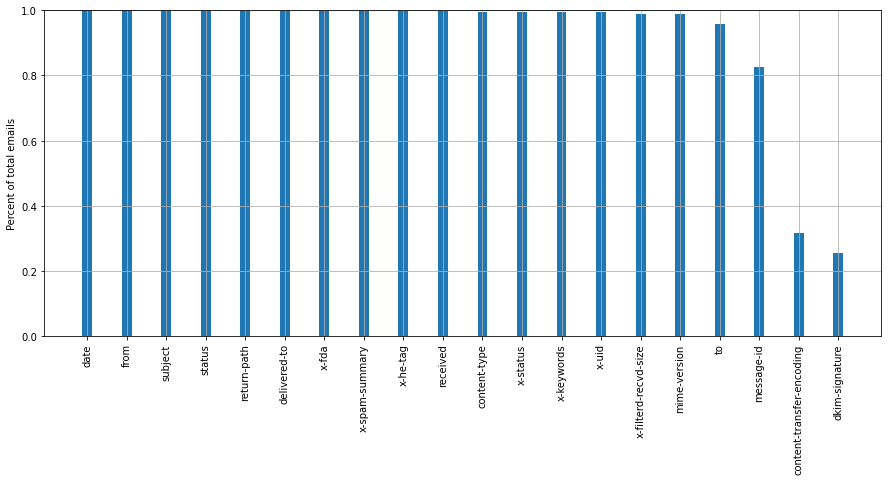

In [4]:
parser = HeaderParser()
dict_header_features = {}
total_emails = 0


def addEmailsToDict(email_list):
    global parser, dict_header_features, total_emails
    
    # Read the full email content
    for email in email_list:
        
        total_emails += 1
        h = parser.parsestr(email)
        features_lower_case = [x.lower() for x in h.keys()]
        features_dict = Counter(features_lower_case)

        for k,v in features_dict.items():
            if k in dict_header_features:
                dict_header_features[k] += 1
            else:
                dict_header_features[k] = 1

                
def main():
    global dict_header_features, total_emails
        
    file_path_list = ['Phishing Dataset/phishing-2017.txt', 'Phishing Dataset/phishing-2018.txt',
                     'Phishing Dataset/phishing-2019.txt', 'Phishing Dataset/phishing-2020.txt']
    
    for file_path in file_path_list:
        # Read the full email content
        emailStr = ''
        try:
            with open(file_path, encoding='latin_1') as emailFile:
                for line in emailFile:
                    emailStr += line
        except UnicodeDecodeError:
            print('Unicode Error!')

        email_list = emailStr.split('\nFrom jose@monkey.org')
        #print(email_list[1])

        addEmailsToDict(email_list)
        
    dict_header_features = sorted(dict_header_features.items(), key=lambda x:x[1], reverse=True)

    for v in dict_header_features:
        print(v)
        
    unzipped = list(zip(*dict_header_features))
    lab = unzipped[0]
    val = unzipped[1]
    print("TOTAL EMAIL COUNT:", total_emails)
    val = [x/total_emails for x in val]
    figure(figsize=(15, 6))
    axes = plt.gca()
    axes.set_ylim([0,1])
    plt.xticks(rotation='vertical')
    plt.ylabel('Percent of total emails')
    plt.bar(lab[0:20], val[0:20], width=0.25)
    plt.grid()
    plt.savefig('most_common_header_features_phish.png', bbox_inches="tight")
    plt.show()

if __name__ == '__main__':
    main()